In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
workplace = 'ML'
try:
    os.chdir(os.path.join('/content/drive/MyDrive', workplace))
except:
    os.mkdir(os.path.join('/content/drive/MyDrive', workplace))
    os.chdir(os.path.join('/content/drive/MyDrive', workplace))

## Import package

In [ ]:
#matrix math
import numpy as np
#graphing
import matplotlib.pyplot as plt
#graphing animation
import matplotlib.animation as animation

## Dataset

In [ ]:
#load textfile dataset (2D data points)
# for each user, how many packets are sent per second and what's the size of a packet
#anomalies (DDOS attempts) will have lots of big packets sent in a short amount of time 
def load_dataset(name):
    return np.loadtxt(name)

In [ ]:
#set the dataset
dataset = load_dataset('durudataset.txt')
print(dataset.shape)
dataset[0:5,:]

(40, 2)


array([[0.19670575, 0.26617497],
       [0.41328699, 0.35582835],
       [0.33843555, 0.43573826],
       [0.10380152, 0.16434481],
       [0.15905236, 0.32505901]])

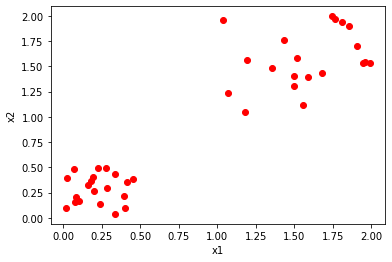

In [ ]:
x1 = dataset[:,0:dataset.shape[1] - 1]
x2 = dataset[:,-1]
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x1,x2, c='r')

## 欧式距离

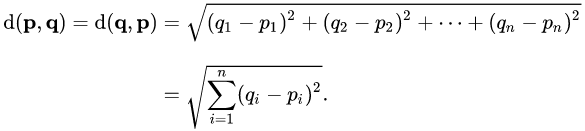

In [ ]:
#euclidian distance between 2 data points. For as many data points as necessary. 
def euclidian(a, b):
    return np.linalg.norm(a-b)

In [ ]:
x = [2,3]
y = [4,6]
a = np.array(x)
b = np.array(y)
euclidian(a,b)

3.605551275463989

## k-means algorithm

- 算法原理：
- 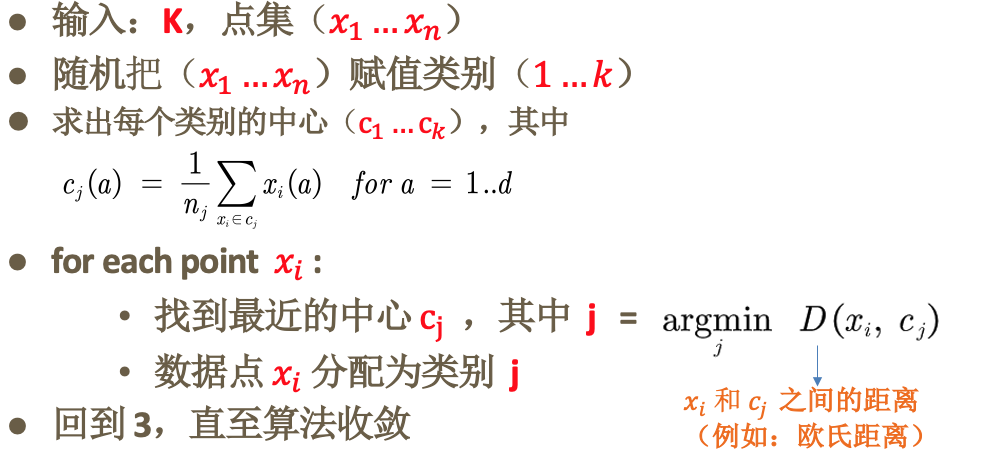
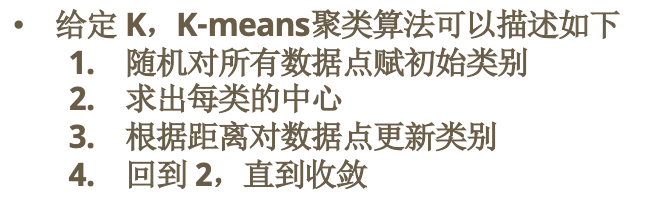

O k-means algorithm With the above steps, since we needed to build our algorithm, which will receive as parameters:

* K: The number of clusters (required)
* epsilon: The minimum error to be used in the stop condition (optional, default == 0)
* Distance: The method is used to calculate the distance (Optional defalut == 0) And has the return:
* the centroids
* The evolution history of centroids
* And the membership vector of each instance with its respective centroid


In [ ]:
def kmeans(k, epsilon=0, distance='euclidian'):
    #list to store past centroid
    history_centroids = []
    history_belongs = []
    #set the distance calculation type 
    if distance == 'euclidian':
        dist_method = euclidian
    # get the number of rows (instances) and columns (features) from the dataset
    num_instances, num_features = dataset.shape
    #define k centroids (how many clusters do we want to find?) chosen randomly 
    prototypes = dataset[np.random.randint(0, num_instances - 1, size=k)]
    #set these to our list of past centroid (to show progress over time)
    history_centroids.append(prototypes)
    #to keep track of centroid at every iteration
    prototypes_old = np.zeros(prototypes.shape)
    #to store clusters
    belongs_to = np.zeros((num_instances, 1))
    norm = dist_method(prototypes, prototypes_old)
    iteration = 0
    while norm > epsilon and iteration < 10:
        iteration += 1
        norm = dist_method(prototypes, prototypes_old)
        # temp belongs_to
        temp_belongs_to = np.zeros((num_instances, 1))
        #for each instance in the dataset
        for index_instance, instance in enumerate(dataset):
            #define a distance vector of size k
            dist_vec = np.zeros((k,1))
            #for each centroid
            for index_prototype, prototype in enumerate(prototypes):
                #compute the distance between x and centroid
                dist_vec[index_prototype] = dist_method(prototype, instance)
            #find the smallest distance, assign that distance to a cluster
            temp_belongs_to[index_instance] = np.argmin(dist_vec)
            
        tmp_prototypes = np.zeros((k, num_features))
        prototypes_old = prototypes

        #for each cluster (k of them)
        for index in range(len(prototypes)):
            #get all the points assigned to a cluster
            instances_close = [i for i in range(len(temp_belongs_to)) if temp_belongs_to[i] == index]
            #find the mean of those points, this is our new centroid
            prototype = np.mean(dataset[instances_close], axis=0)
            #add our new centroid to our new temporary list
            tmp_prototypes[index, :] = prototype
        
        #set the new list to the current list
        prototypes = tmp_prototypes
        belongs_to = temp_belongs_to

        
        #add our calculated centroids to our history for plotting
        #Python是基于对象引用的，append添加的是一个“地址、引用”，当这个地址内的内容改变时，前面的同“地址”的内容都改变
        #每次循环都创建一个temp变量然后append
        history_centroids.append(tmp_prototypes)
        history_belongs.append(temp_belongs_to)

    #return calculated centroids, history of them all, and assignments for which cluster each datapoint belongs to
    return prototypes, history_centroids, belongs_to, history_belongs, iteration


## Plot

In [ ]:
#lets define a plotting algorithm for our dataset and our centroids
def plot(dataset, centroids, belongs_to, k):
    #we'll have 2 colors for each centroid cluster
    colors = ['r', 'g']

    #split our graph by its axis and actual plot
    fig, ax = plt.subplots()

    #for each point in our dataset
    for index in range(k):
        #get all the points assigned to a cluster
        instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
        #assign each datapoint in that cluster a color and plot it
        for instance_index in instances_close:
            ax.plot(dataset[instance_index][0], dataset[instance_index][1], (colors[index] + 'o'))

    for i in range(len(centroids)):
        ax.plot(centroids[i][0], centroids[i][1], 'bo')
    plt.show()   

## main

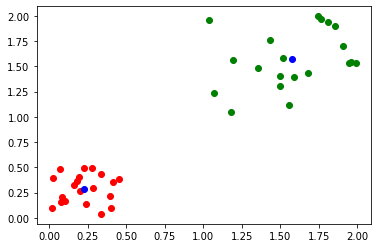

5

In [ ]:
#train the model on the data
centroids, history_centroids, belongs_to, history_belongs, iteration = kmeans(2)
#plot the results
plot(dataset, centroids, belongs_to, 2)
iteration

## plot each step centriods

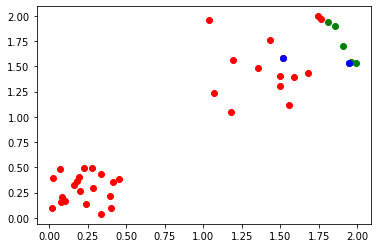

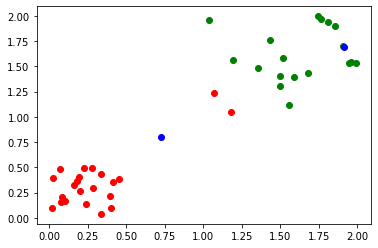

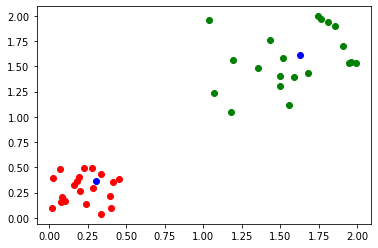

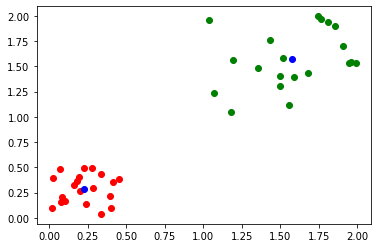

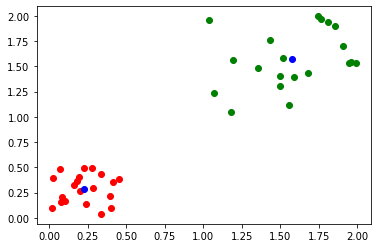

In [ ]:
for i, item in enumerate(history_centroids):
    try:
        plot(dataset, item, history_belongs[i], 2)
    except:
        pass